In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import torch
from torch import nn

from utils import flat_to_triangular, make_cholesky, plot

np.random.seed(3)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def _npz(fn, *args, **kwargs):
    args = [t.cpu().detach().numpy() if isinstance(t, torch.Tensor) else t for t in args]
    kwargs = {k:t.cpu().detach().numpy() if isinstance(t, torch.Tensor) else t for k,t in kwargs.items()}
    return fn(*args, **kwargs)

# Introduction

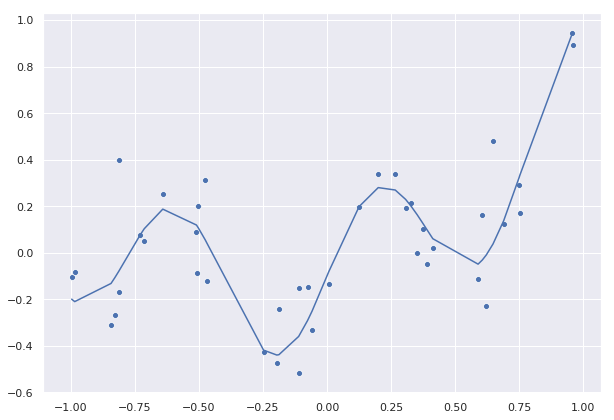

In [3]:
N_axis = 256
N = 40
true_a = torch.tensor([.3, .5, .3], device=device).view(-1, 1)
true_b = torch.tensor(0.2, device=device)
sigma = torch.tensor(0.15, device=device)  # observation noise
# x = np.linspace(-1, 1, N).reshape(-1, 1)

# create axis
x = torch.tensor((np.random.rand(N_axis) * 2 - 1).reshape(-1, 1), dtype=torch.float, device=device)
x,_ = torch.sort(x, dim=0)
fx1 = x - 1
fx2 = x**2
fx3 = torch.sin(8 * x)
x_axis = x
fx_axis = torch.cat((fx1, fx2, fx3), dim=-1)

# create data
x = torch.tensor((np.random.rand(N) * 2 - 1).reshape(-1, 1), dtype=torch.float, device=device)
x,_ = torch.sort(x, dim=0)
fx1 = x - 1
fx2 = x**2
fx3 = torch.sin(8 * x)
fx = torch.cat((fx1, fx2, fx3), dim=-1)
t = fx @ true_a + true_b + sigma*torch.ones(x.shape, device=device).normal_()  # observations
plt.figure(figsize=(10, 7))

_npz(plt.plot, x, fx @ true_a + true_b)
# plt.plot(x, fx, alpha=0.3)
_npz(sns.scatterplot, x[:, 0], t[:, 0])
plt.show() 